In [2]:
!pip install Bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 929.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 27.4 MB/s eta 0:00:00


In [106]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import re
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
# Чтение файла
with open('/content/drive/MyDrive/Colab Notebooks/Hak/Balanced_dataset.txt', 'r') as file:
    lines = file.readlines()

# Инициализация списка для хранения данных
data = []

# Парсинг строк файла
for i in range(0, len(lines), 2):
    header = lines[i].strip()
    sequence = lines[i+1].strip()
    _, value = header.split('|')
    data.append([sequence, int(value)])

df = pd.DataFrame(data, columns=['sequence', 'is_active'])

df

,sequence,is_active
0,RRRRRRRGGIYLATALAKWALKQGF,0
1,IYLATALAKWALKQGFGGRRRRRRR,0
2,RRRRRRRGGKLAKLAKKLAKLAK,0
3,KKALLAHALHLLALLALHLAHALKKA,0
4,GALFLGFLGAAGSTMGAWSQPKSKRKV,0
...,...,...
919,QLEINNIPCKICIIVIGPCWEERTGTTQERPSEAKHDIWYKTNQQGARH,1
920,MFPWDQNCSCFRKRHVFMCKEYRYQVDPRCMHDIYHFSSFWDSMDMVLV,1
921,RCYYNAGSVDACCLKCWQWGASCWNQLRLPCKGVSPNCCNSTARER...,1
922,HRYCVCFYFYAFMGTMTKFLMVAPTFEFCLNLAIFPNLFMHMSVDC...,1


In [109]:
def calculate_peptide_descriptors(peptide):
    valid_aa = set('ACDEFGHIKLMNPQRSTVWY')
    if not set(peptide).issubset(valid_aa):
        return None

    analyzed_peptide = ProteinAnalysis(peptide)
    return {
        "molecular_weight": analyzed_peptide.molecular_weight(),
        "isoelectric_point": analyzed_peptide.isoelectric_point(),
        "gravy": analyzed_peptide.gravy(),
        "amino_acid_composition": analyzed_peptide.count_amino_acids(),
        "instability_index": analyzed_peptide.instability_index(),
        "aromaticity": analyzed_peptide.aromaticity(),
        "chain_length": len(peptide)
    }

# Apply the function to the 'Sequence' column and create new DataFrame from the results
descriptors_df = df['sequence'].apply(calculate_peptide_descriptors).apply(pd.Series)

# Concatenate the original DataFrame with the descriptors DataFrame
df = pd.concat([df, descriptors_df], axis=1)
df

,sequence,is_active,molecular_weight,isoelectric_point,gravy,amino_acid_composition,instability_index,aromaticity,chain_length
0,RRRRRRRGGIYLATALAKWALKQGF,0,3001.55,12.00,-0.84,"{'A': 4, 'C': 0, 'D': 0, 'E': 0, 'F': 1, 'G': ...",145.26,0.12,25.00
1,IYLATALAKWALKQGFGGRRRRRRR,0,3001.55,12.00,-0.84,"{'A': 4, 'C': 0, 'D': 0, 'E': 0, 'F': 1, 'G': ...",152.06,0.12,25.00
2,RRRRRRRGGKLAKLAKKLAKLAK,0,2731.39,12.00,-1.45,"{'A': 4, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': ...",142.21,0.00,23.00
3,KKALLAHALHLLALLALHLAHALKKA,0,2779.46,10.48,0.92,"{'A': 8, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': ...",-0.18,0.00,26.00
4,GALFLGFLGAAGSTMGAWSQPKSKRKV,0,2766.22,11.26,0.11,"{'A': 4, 'C': 0, 'D': 0, 'E': 0, 'F': 2, 'G': ...",23.39,0.11,27.00
...,...,...,...,...,...,...,...,...,...
919,QLEINNIPCKICIIVIGPCWEERTGTTQERPSEAKHDIWYKTNQQGARH,1,5706.41,6.91,-0.80,"{'A': 2, 'C': 3, 'D': 1, 'E': 5, 'F': 0, 'G': ...",39.29,0.06,49.00
920,MFPWDQNCSCFRKRHVFMCKEYRYQVDPRCMHDIYHFSSFWDSMDMVLV,1,6217.17,6.80,-0.42,"{'A': 0, 'C': 4, 'D': 5, 'E': 1, 'F': 5, 'G': ...",45.26,0.20,49.00
921,RCYYNAGSVDACCLKCWQWGASCWNQLRLPCKGVSPNCCNSTARER...,1,5864.70,8.73,-0.45,"{'A': 4, 'C': 8, 'D': 1, 'E': 2, 'F': 0, 'G': ...",71.58,0.10,52.00
922,HRYCVCFYFYAFMGTMTKFLMVAPTFEFCLNLAIFPNLFMHMSVDC...,1,6570.85,6.02,0.83,"{'A': 5, 'C': 5, 'D': 2, 'E': 2, 'F': 8, 'G': ...",62.09,0.20,56.00


In [110]:
df = df[df['molecular_weight'].notna()]
expanded_amino_acid_composition_df = df['amino_acid_composition'].apply(pd.Series)
df = df.drop(columns=['amino_acid_composition']).join(expanded_amino_acid_composition_df)

In [67]:
!pip install lazypredict

In [111]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [112]:
Y_field = 'is_active'
X_fields = [col for col in df.columns if (col != Y_field) & (col != 'sequence')]

X = df[X_fields]
scaler = StandardScaler()
X_scaled_arr = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_arr, columns=X_fields)
Y = df[Y_field]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state = 0)

In [113]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:02<00:00, 10.15it/s]

[LightGBM] [Info] Number of positive: 371, number of negative: 365
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1286
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504076 -> initscore=0.016305
[LightGBM] [Info] Start training from score 0.016305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [114]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.92,0.92,0.92,0.92,0.09
KNeighborsClassifier,0.90,0.90,0.90,0.90,0.04
AdaBoostClassifier,0.90,0.90,0.90,0.90,0.23
ExtraTreesClassifier,0.90,0.90,0.90,0.90,0.33
LogisticRegression,0.90,0.90,0.90,0.90,0.08
BaggingClassifier,0.89,0.89,0.89,0.89,0.11
LGBMClassifier,0.89,0.89,0.89,0.89,0.15
QuadraticDiscriminantAnalysis,0.89,0.89,0.89,0.88,0.05
CalibratedClassifierCV,0.89,0.89,0.89,0.89,0.28


<Axes: >

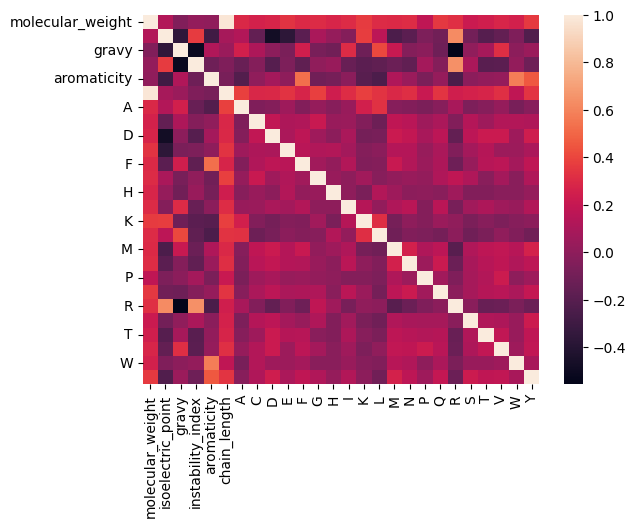

In [115]:
import seaborn as sb
%matplotlib inline

corr = X_scaled.corr()
sb.heatmap(corr)

In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8967391304347826


In [119]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.9185
Confusion Matrix:
[[85  8]
 [ 7 84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        93
           1       0.91      0.92      0.92        91

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



In [88]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.8 MB/s eta 0:00:00


In [118]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score

model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')



Accuracy: 0.9185
